###***BUSINESS UNDERSTANDING***

****Problem Statement****

One of the main challenges that football fanatics face is making accurate predictions when they bet in pursuit to win cash prices.The current manual approach for determining odds and probabilities is prone to human error and lacks consistency. We develop a robust and reliable machine learning model that can accurately forecast the results of football matches, enabling them to set more precise odds.

###***DATA UNDERSTANDING***

In this section we will explore our data by checking:

- Inspecting the first and last five rows
- Number of rows and columns
- Data types of each feature
- Data quality(outliers,null values and duplicates)
- Summary statistics




****Importing Necessary Dependencies****

In [1]:
!pip install pandas_profiling -qqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.9/352.9 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 96.1 MB/s eta 0:00:00


In [2]:
# mathematical computations
import numpy as np

# data manipulation
import pandas as pd
import pandas_profiling as pp
from pandas_profiling import ProfileReport

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# warnings
import warnings
warnings.filterwarnings('ignore')


<ipython-input-2-c32a4ca3905b>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# load data
data = pd.read_csv('/content/gdrive/MyDrive/football_prediction/data/results.csv')


In [5]:
# number of rows and columns
shape = data.shape
print(f'The data has {shape[0]} rows and {shape[1]} columns')

The data has 44557 rows and 9 columns


In [6]:
# columns
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [7]:
# column description
column_names = ['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Tournament', 'City', 'Country', 'Neutral']
column_descriptions = ['date of the match', 'the name of the home team', 'the name of the away team', 'full-time home team score including extra time, not including penalty-shootouts', 'full-time away team score including extra time, not including penalty-shootouts', 'the name of the tournament', 'the name of the city/town/administrative unit where the match was played', 'the name of the country where the match was played', 'TRUE/FALSE column indicating whether the match was played at a neutral venue']

data_desc = list(zip(column_names, column_descriptions))
df = pd.DataFrame(data_desc, columns=['Column_Name', 'Column_Description'])

df

,Column_Name,Column_Description
0,Date,date of the match
1,Home Team,the name of the home team
2,Away Team,the name of the away team
3,Home Score,full-time home team score including extra time...
4,Away Score,full-time away team score including extra time...
5,Tournament,the name of the tournament
6,City,the name of the city/town/administrative unit ...
7,Country,the name of the country where the match was pl...
8,Neutral,TRUE/FALSE column indicating whether the match...


In [8]:
# first five rows
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [9]:
# last five rows
data.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False
44556,2023-03-29,Rwanda,Benin,1,1,African Cup of Nations qualification,Kigali,Rwanda,False


In [10]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44557 entries, 0 to 44556
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44557 non-null  object
 1   home_team   44557 non-null  object
 2   away_team   44557 non-null  object
 3   home_score  44557 non-null  int64 
 4   away_score  44557 non-null  int64 
 5   tournament  44557 non-null  object
 6   city        44557 non-null  object
 7   country     44557 non-null  object
 8   neutral     44557 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.8+ MB


The dataset has 9 features: 2 numerical,1 boolean and 6 columns of object data type. Each column has 44557 non-null values implying that our dataset has zero null values.

In [11]:
# summary statistics
data.describe()

,home_score,away_score
count,44557.000000,44557.000000
mean,1.739278,1.178401
std,1.747263,1.393775
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [12]:
# check duplicates
data.duplicated().any()

False

In [13]:
# check null values
data.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [14]:
# check outliers

def find_outliers(data, threshold=3):
    """
    Identifies outliers in a given dataset using the z-score method.

    Parameters:
        - data (array-like): The dataset to be checked for outliers.
        - threshold (float): The threshold value for identifying outliers. Data points
          with a z-score greater than the threshold will be considered outliers.
          Default is 3, which is a commonly used value.

    Returns:
        - outliers (list): A list of the outlier values found in the dataset.
    """
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(x - mean) / std for x in data]
    outliers = [data[i] for i, z in enumerate(z_scores) if abs(z) > threshold]

    return outliers


In [15]:
# numerical columns
num_columns = data.select_dtypes(include = 'int64')

# find outliers
for col in num_columns.columns:
  outliers = find_outliers(data[col])
  outliers_len = len(outliers)
  per_outliers = len(outliers)/len(data)*100
  print(f'{col} has {len(outliers)} outliers which is {round(per_outliers,2)}% of the entire dataset')

home_score has 889 outliers which is 2.0% of the entire dataset
away_score has 607 outliers which is 1.36% of the entire dataset


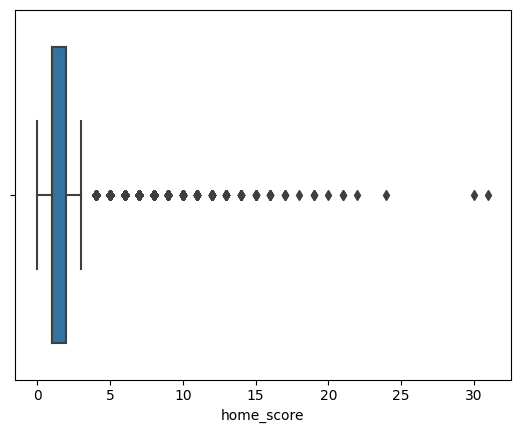

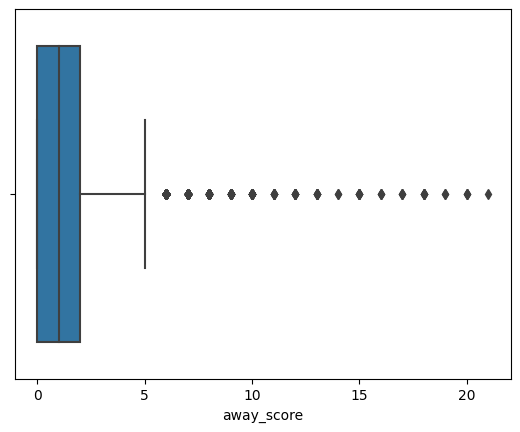

In [16]:
# visualise outliers
for col in num_columns.columns:
  fig = sns.boxplot(x = data[col])
  plt.show()


From the inspection, our data has few outliers which could be explained by the uncertain nature of football outcomes. There are scores that will be very high which rarely happens but when it does it results to our dataset to containing some outliers. For this reason we will not be dropping them.

In [17]:
# data summary
data_summary = ProfileReport(data, explorative=True)
data_summary.to_file('data_summary.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

###***EXPLORATORY DATA ANALYSIS (EDA)***
---
#### In this section we will work on the following:
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis
- Answer other Questions about the dataset

#### ****UNIVARIATE ANALYSIS****

For univariate analysis we will explore each variable independently.However before we start we will create our target column which will have three labels:
- home_team_win
- draw
- away_team_win.

In [18]:
# create target column
data['result'] = data.apply(lambda row: 'home_team_wins' if row['home_score'] > row['away_score']
                            else 'away_team_wins' if row['home_score'] < row['away_score']
                            else 'draw', axis=1)
#preview data
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,home_team_wins
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,home_team_wins
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,home_team_wins


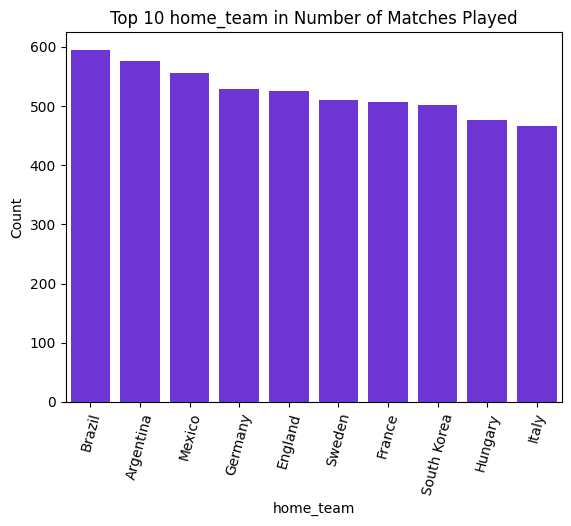

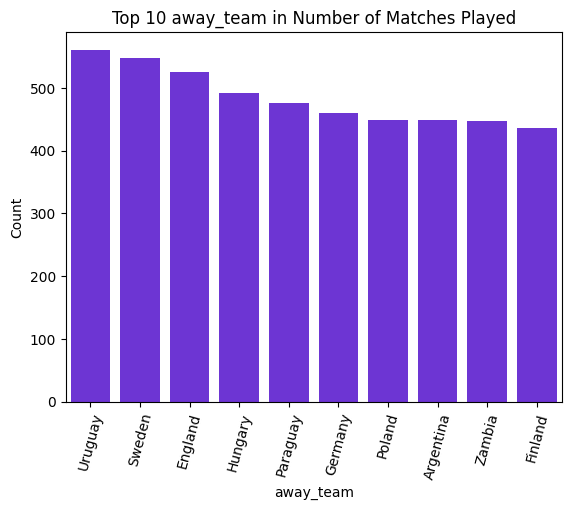

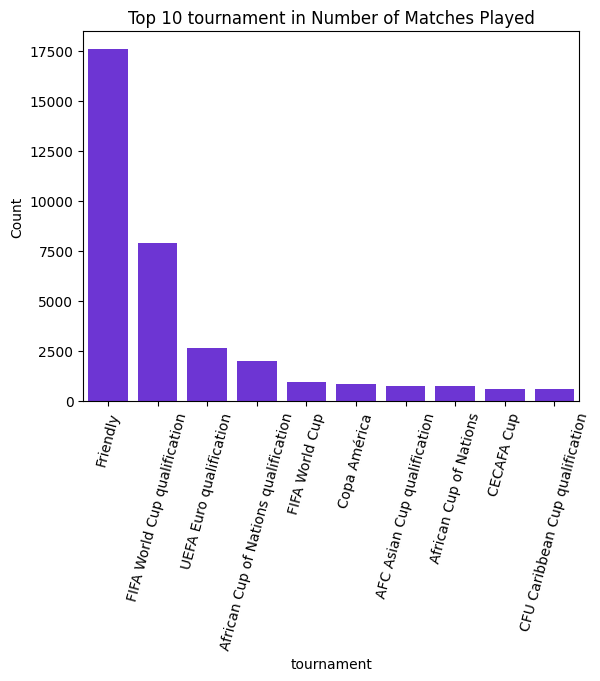

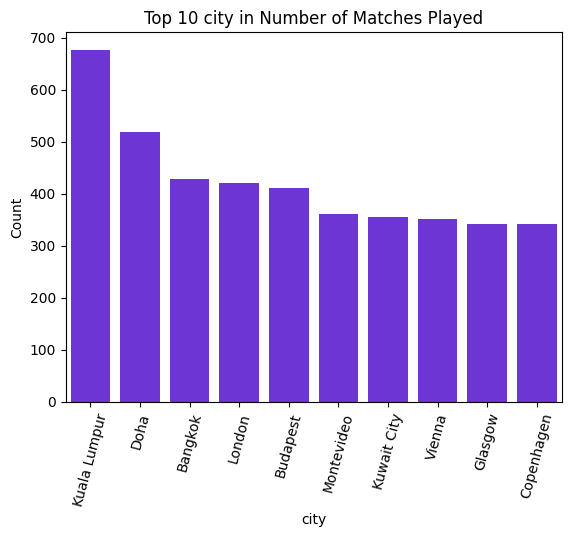

In [19]:
# select categorical columns
cat_columns = data.select_dtypes(include = ['object','bool'])

# visualize the column frquency distribution
for col in cat_columns.columns[1:5]:
    counts = data[col].value_counts().head(10)
    palette = sns.color_palette("viridis")
    fig = sns.countplot(counts, x= data[col],order = counts.index,color ='#661aee' )

    # label axis
    plt.title(f'Top 10 {col} in Number of Matches Played')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 75)
    plt.show()

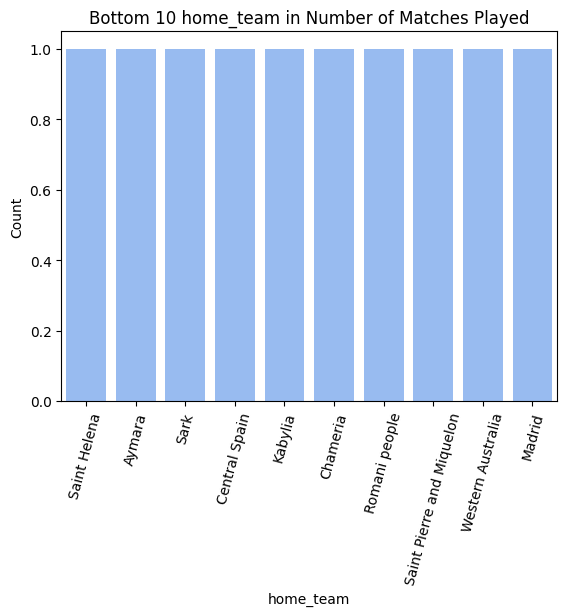

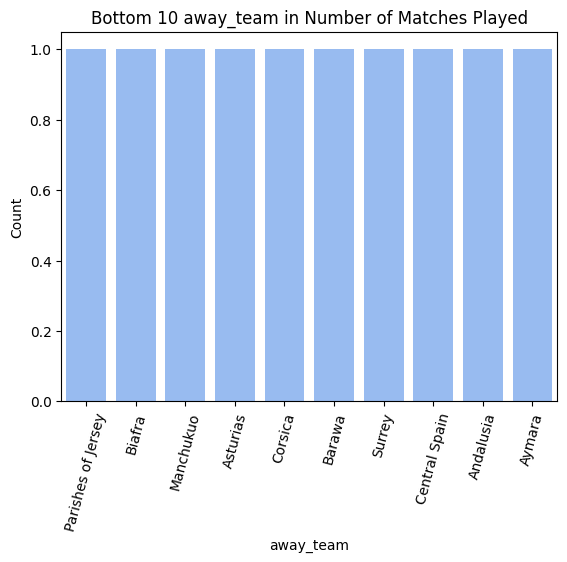

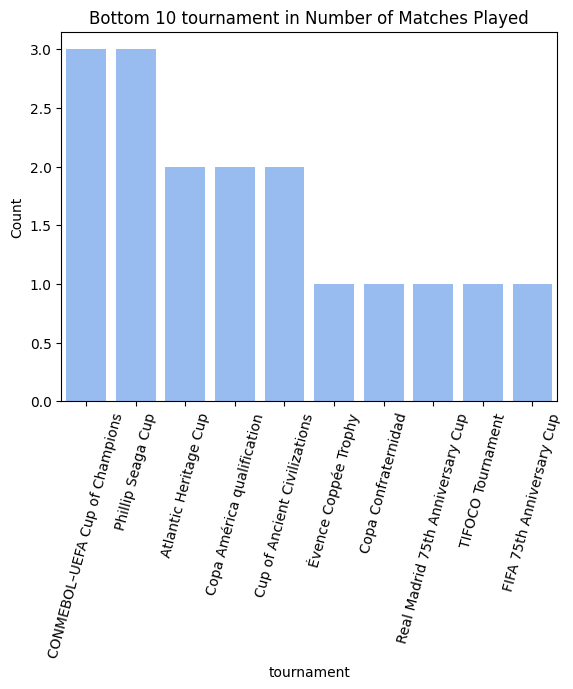

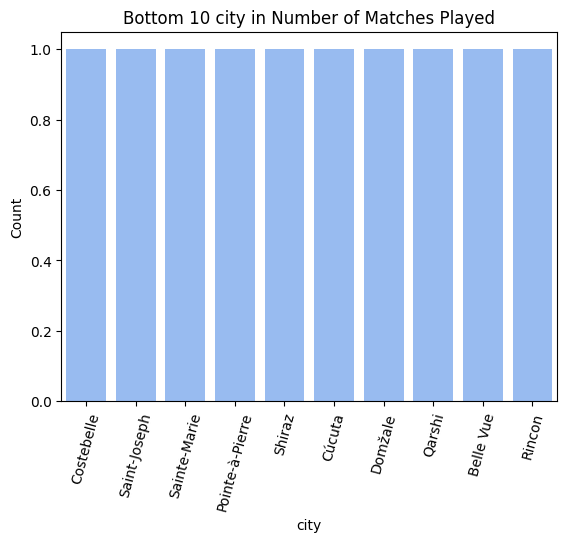

In [20]:
# visualize the column frquency distribution
for col in cat_columns.columns[1:5]:

    # get the counts
    counts = data[col].value_counts().tail(10)

    # plot
    fig = sns.countplot(counts, x= data[col],order = counts.index,color = '#8ab8fe')

    # label axis
    plt.title(f'Bottom 10 {col} in Number of Matches Played')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 75)
    plt.show()

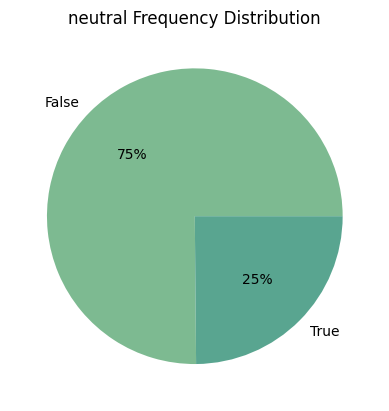

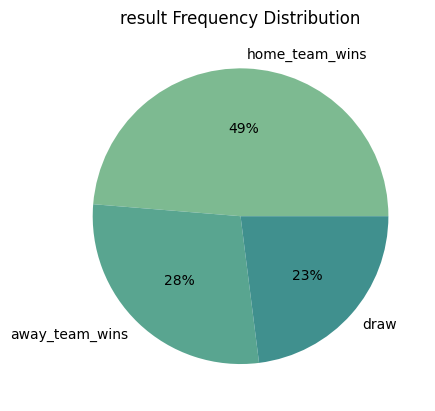

In [23]:
for i in ['neutral','result']:
  # Count the occurrences of each value in the 'neutral' column
  counts = data[i].value_counts()
  # define color palette
  # palette = sns.color_palette("icefire")
  palette = sns.color_palette("crest")
  # create a pie chart
  plt.pie(x = counts.values,labels = counts.index, autopct='%.0f%%',colors = palette)
  plt.title(f'{i} Frequency Distribution')

  # displaying chart
  plt.show()

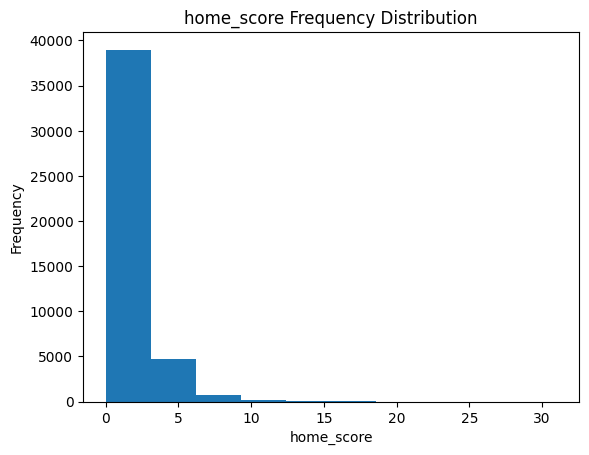

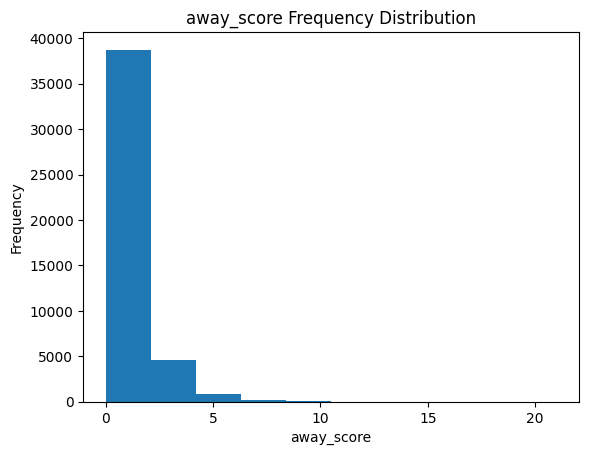

In [ ]:
# Create the histogram
for col in num_columns:
  plt.hist(data[col])
  plt.title(f'{col} Frequency Distribution')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

####  ***BIVARIATE ANALYSIS***

In this analysis we check the relationship between different features.

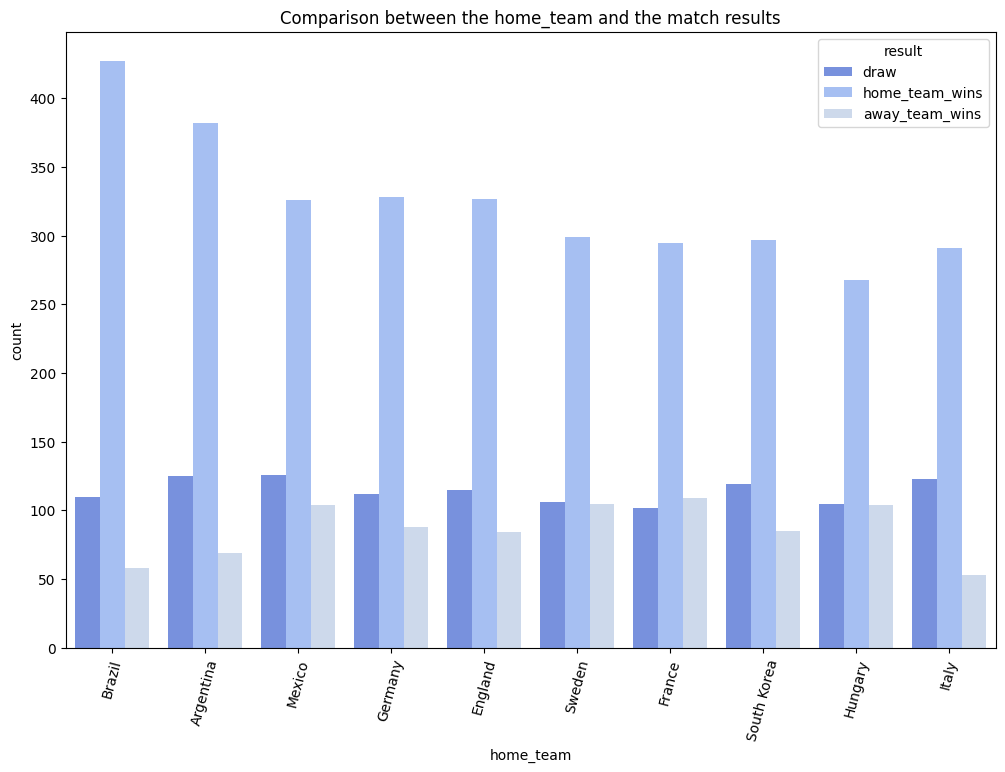

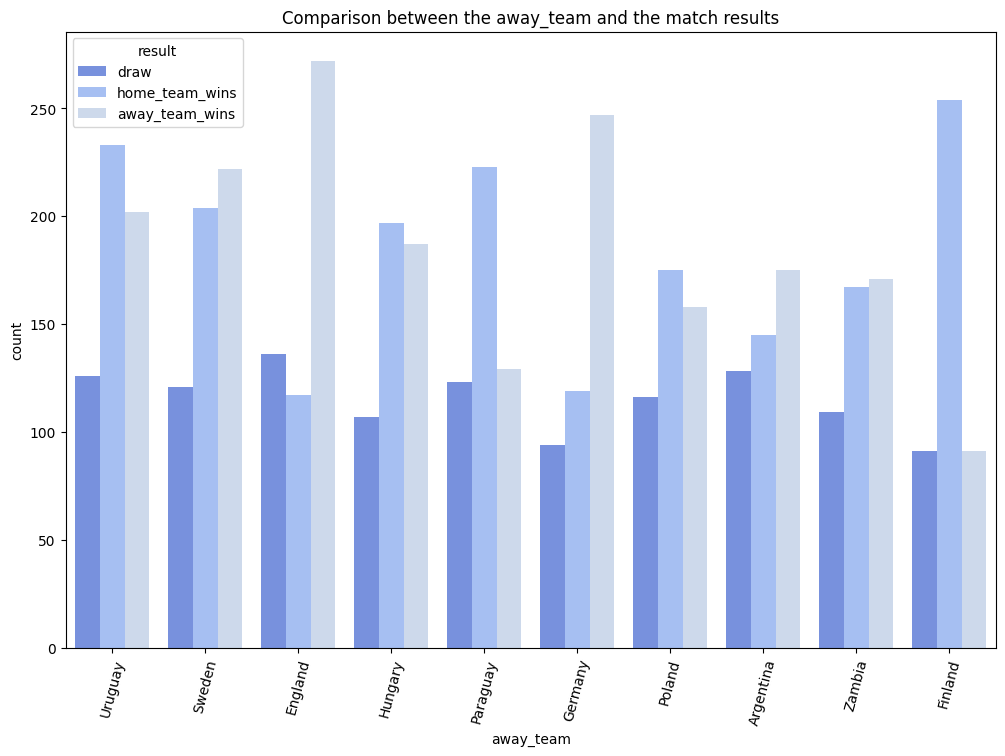

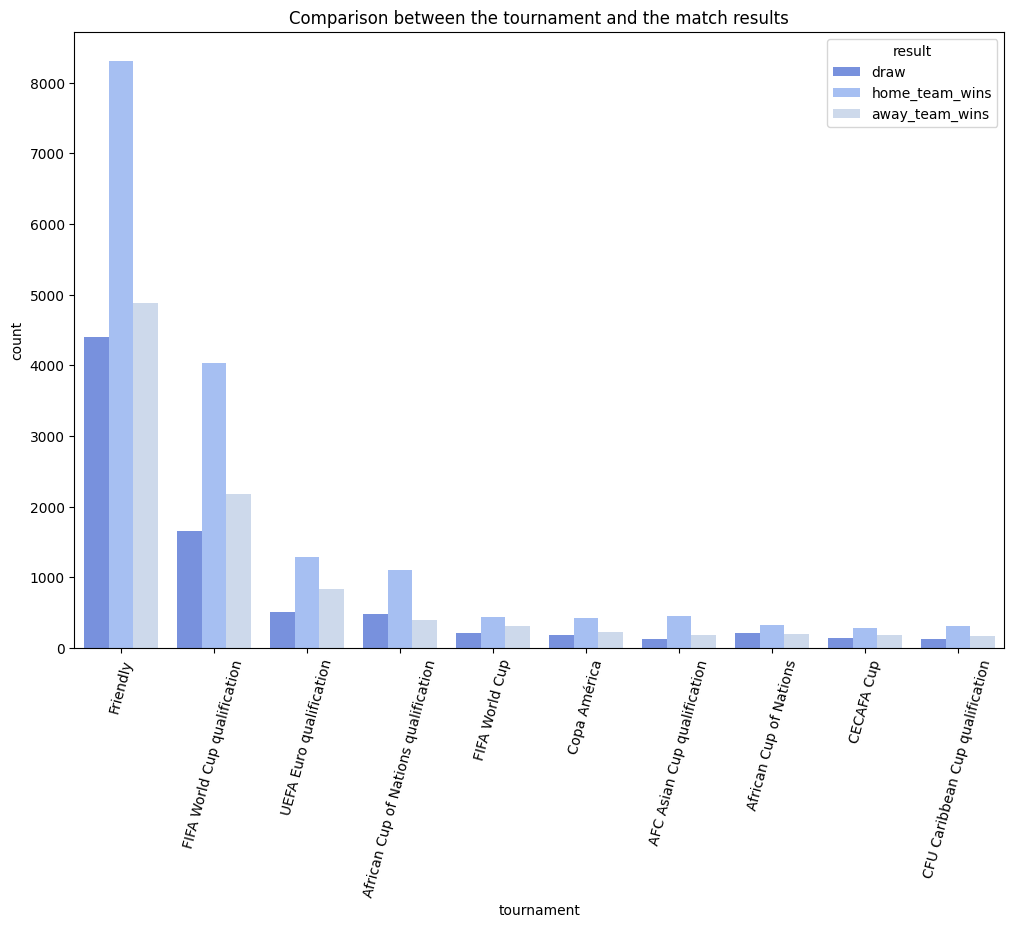

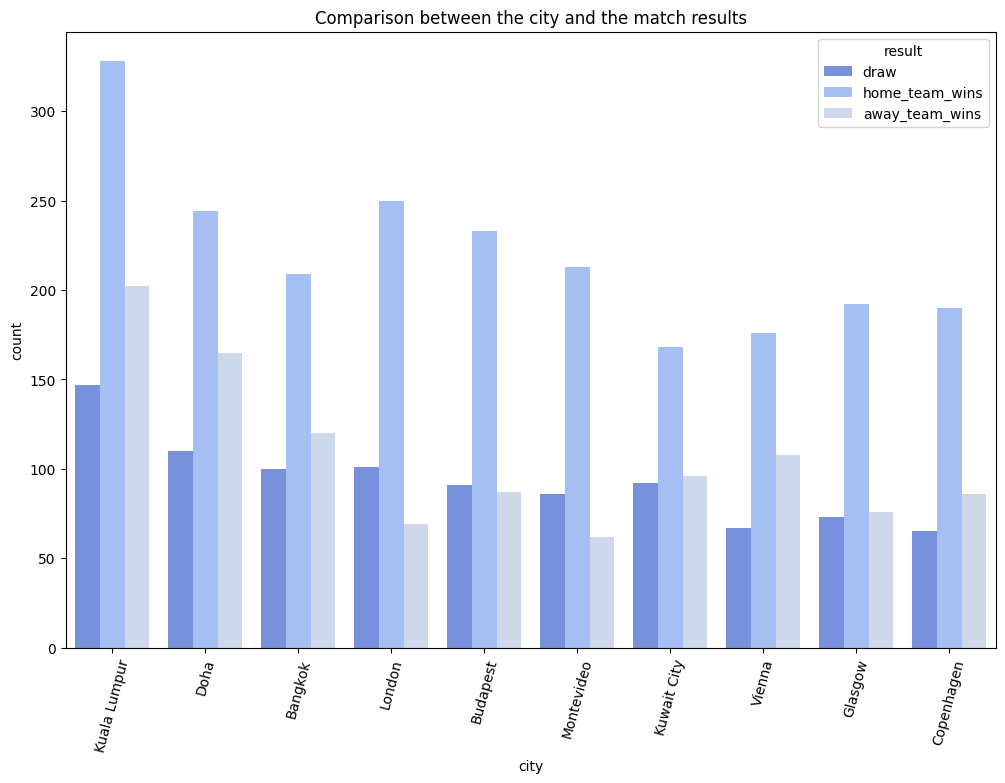

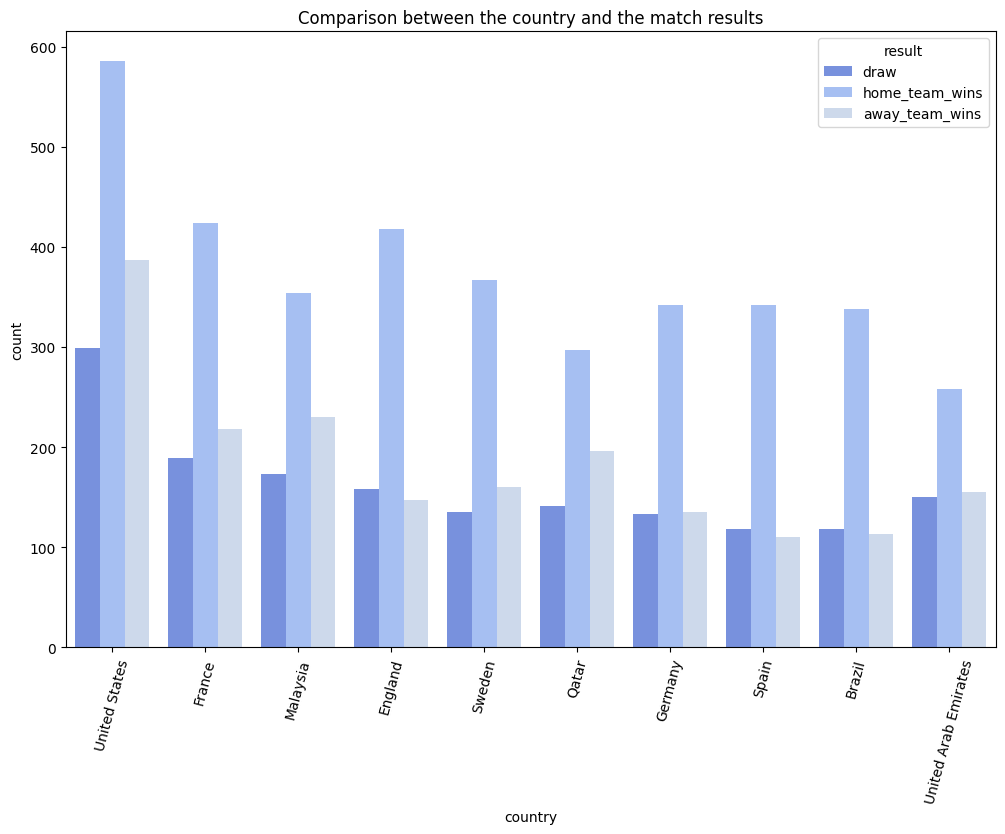

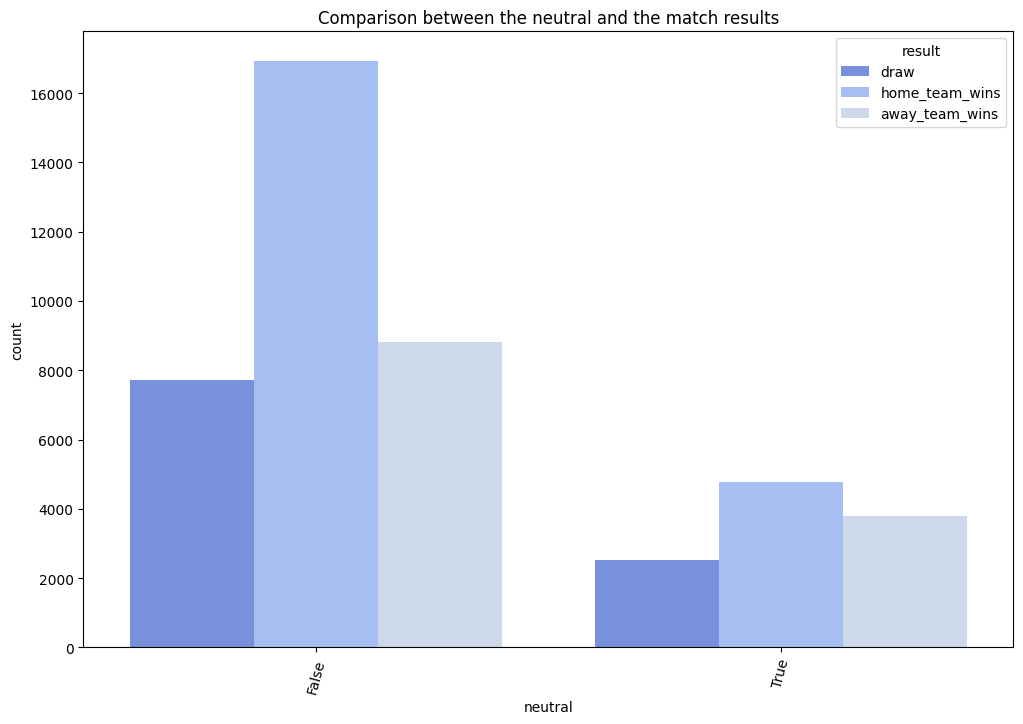

In [ ]:
for col in cat_columns.columns[1:7]:
  top_10 = data[col].value_counts().head(10)
  plt.figure(figsize = (12,8))
  count_plot = sns.countplot(data = data,x=col,hue = 'result',order = top_10.index,palette = sns.color_palette("coolwarm"))
  plt.xticks(rotation = 75)
  plt.title(f'Comparison between the {col} and the match results')
  plt.show()

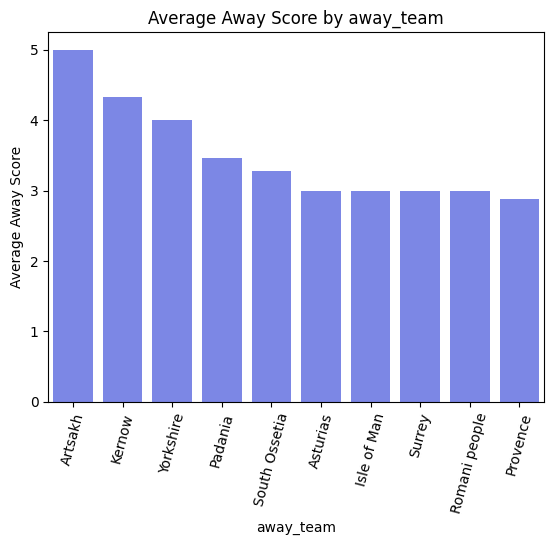

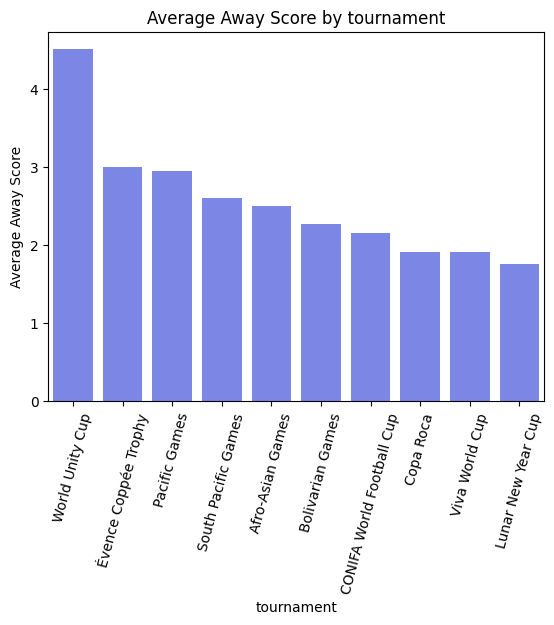

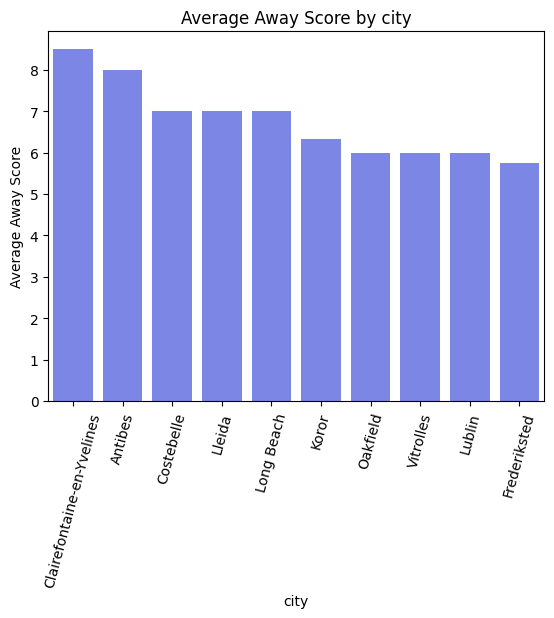

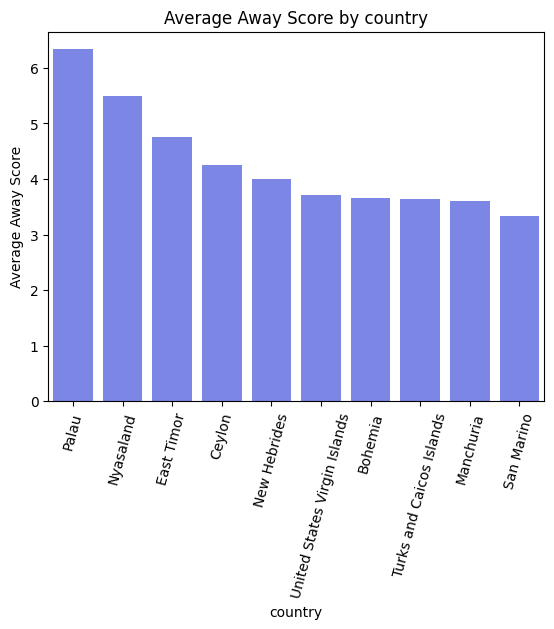

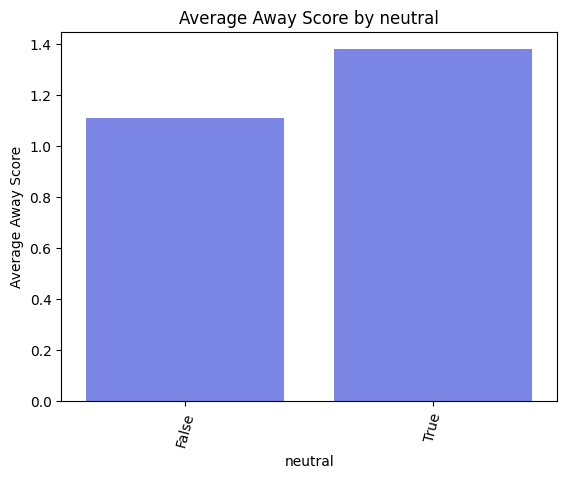

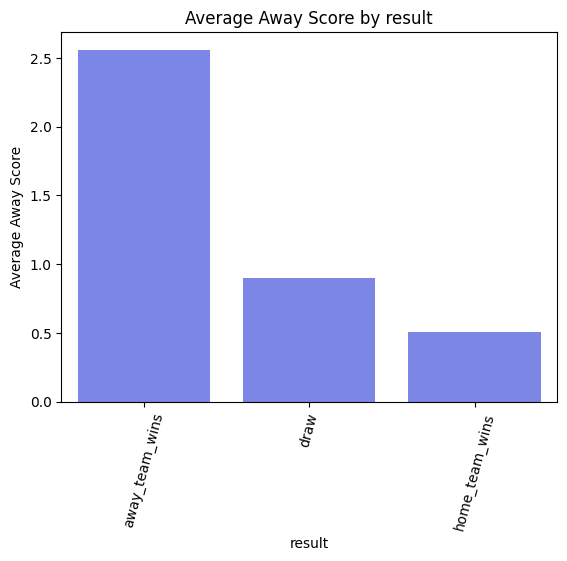

In [ ]:
# visualize all columns against the away score column
for col in cat_columns.columns[2:]:
    grouped_data = data.groupby(col)['away_score'].mean().reset_index().sort_values(by='away_score', ascending=False).head(10)
    fig = sns.barplot(data = grouped_data, x=col, y='away_score',color = '#6a79f7')
    plt.title(f'Average Away Score by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Away Score')
    plt.xticks(rotation = 75)
    plt.show()

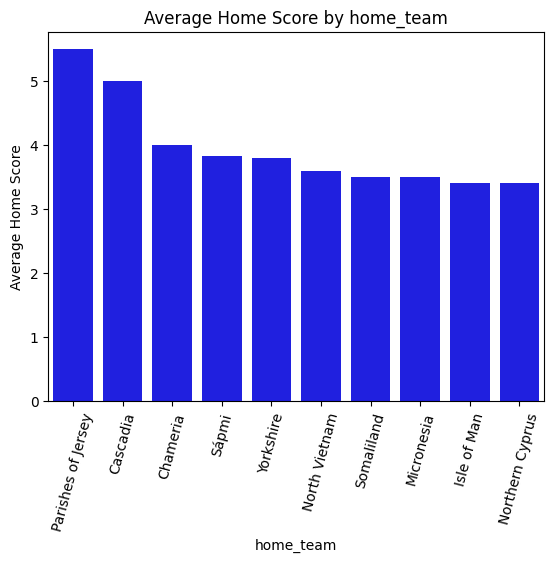

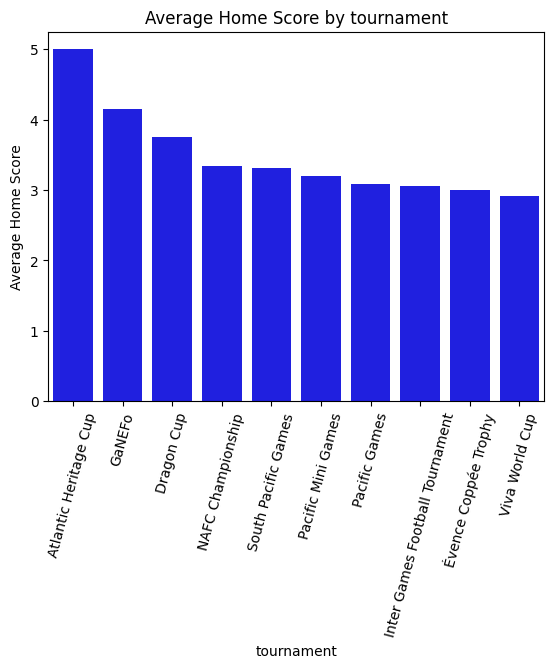

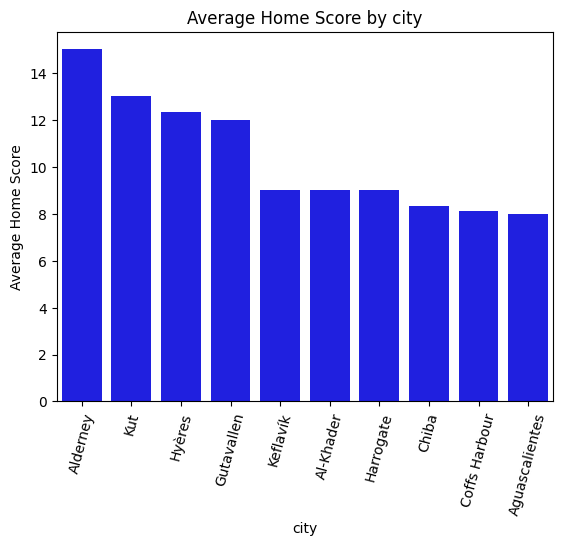

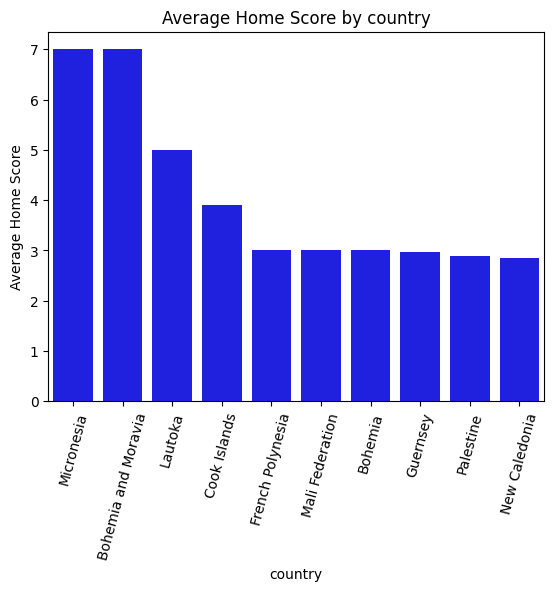

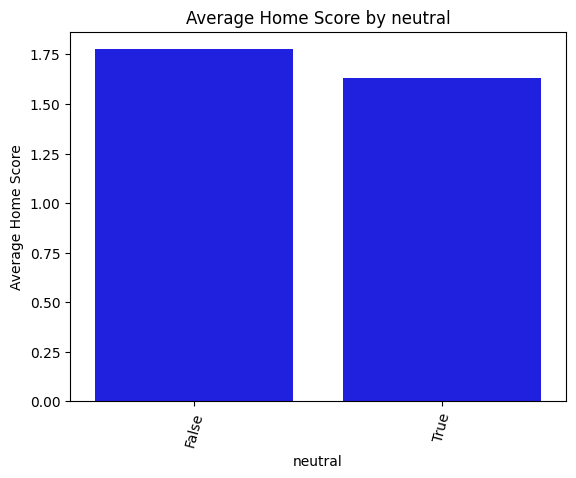

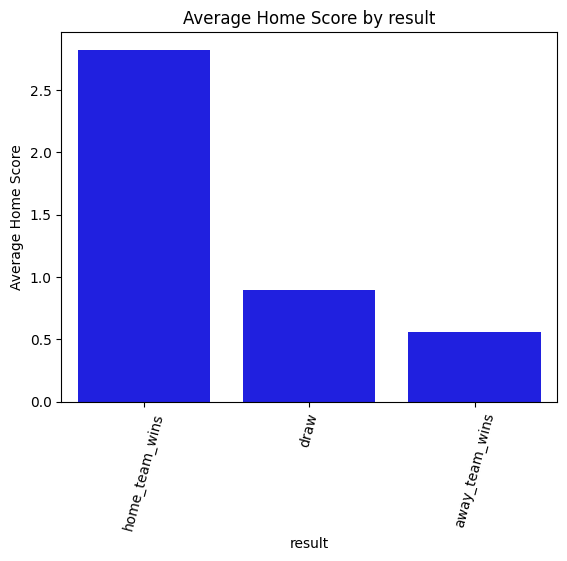

In [ ]:
# visualize all columns against the home score column
for col in cat_columns.columns[1:]:
  if col != 'away_team':
    grouped_data = data.groupby(col)['home_score'].mean().reset_index().sort_values(by='home_score', ascending=False).head(10)
    fig = sns.barplot(data = grouped_data, x=col, y='home_score',color = 'blue')
    plt.title(f'Average Home Score by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Home Score')
    plt.xticks(rotation = 75)
    plt.show()
    # palette = sns.color_palette('flare')

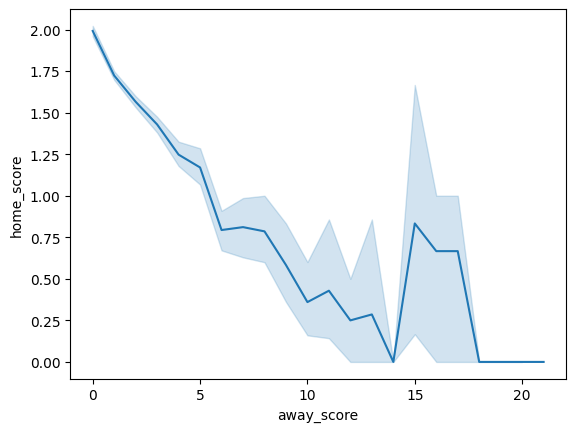

In [ ]:
# Away vs home score
sns.lineplot(data = data,x= 'away_score',y = 'home_score');

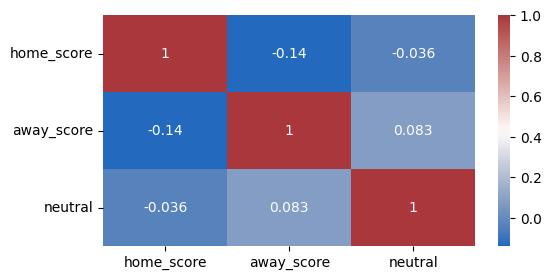

In [28]:
## Co-relation matrix
fig,ax = plt.subplots(figsize = (6,3))
corr = data.corr()
sns.heatmap(corr,annot=True, cmap="vlag");

According to the correlation matrix and line plot, there is a -0.14 weak negative connection between the home and away scores. This implies that a change of one goal in the away score causes a change of 0.14 goals in the home score.

 ****Trend analysis****

Here we examine the trend in the number of goals scored over time.
Let's first convert the date column to datetime datatype.

In [ ]:
# change datatype
data['date'] = pd.to_datetime(data['date'])

# preview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44557 entries, 0 to 44556
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44557 non-null  datetime64[ns]
 1   home_team   44557 non-null  object        
 2   away_team   44557 non-null  object        
 3   home_score  44557 non-null  int64         
 4   away_score  44557 non-null  int64         
 5   tournament  44557 non-null  object        
 6   city        44557 non-null  object        
 7   country     44557 non-null  object        
 8   neutral     44557 non-null  bool          
 9   result      44557 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 3.1+ MB


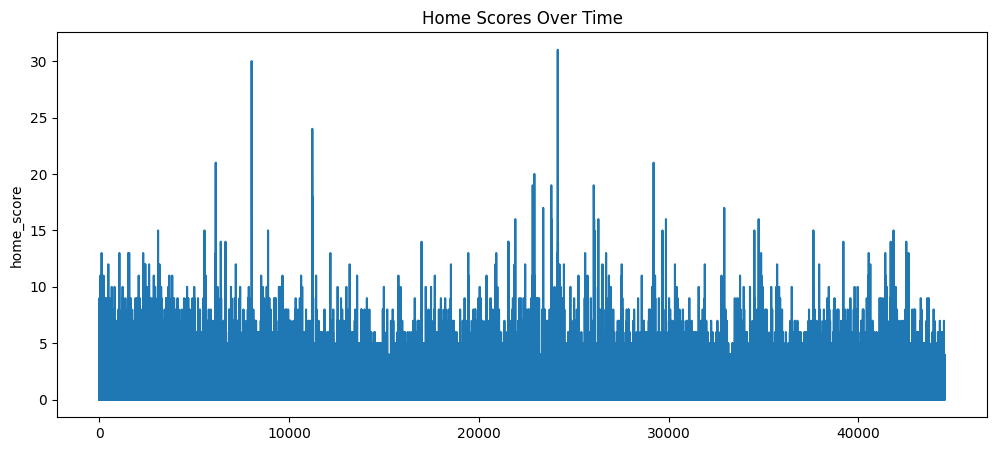

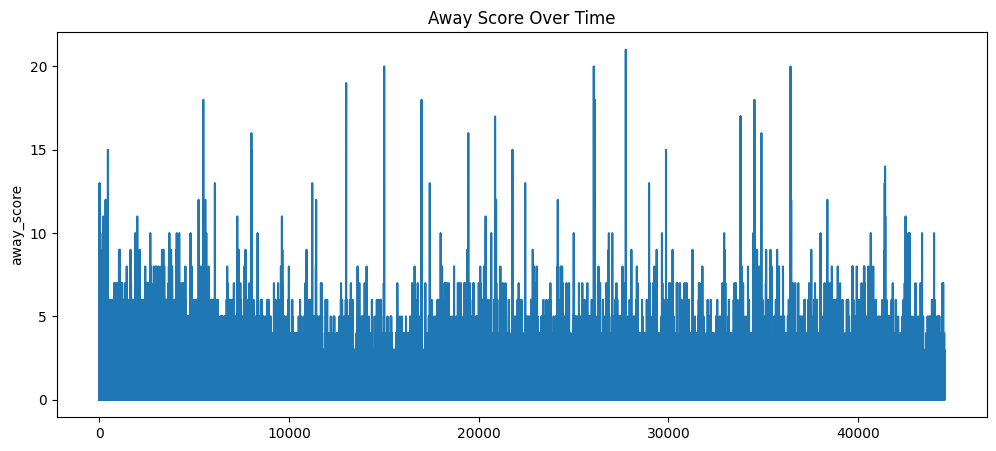

In [ ]:
# home score trend
plt.figure(figsize = (12,5))
sns.lineplot(data['home_score'])
#label axis
plt.title('Home Scores Over Time')

# away score trend
plt.figure(figsize = (12,5))
sns.lineplot(data['away_score'])
# graph title
plt.title('Away Score Over Time');

From the above plots there is no yearly trend in the number of goals scored over the years.

#### ***MULTIVARIATE ANALYSIS***
The relationship between more than two variables is taken into account in this section.

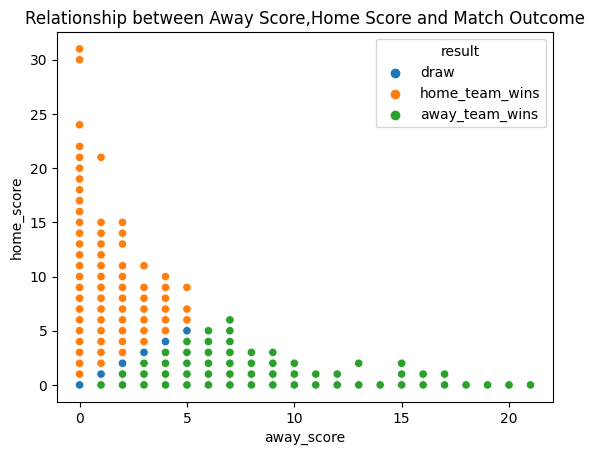

In [ ]:
# relationship between away score,home score and result
sns.scatterplot(data = data,x=data['away_score'],y='home_score',hue = 'result')
plt.title("Relationship between Away Score,Home Score and Match Outcome");

From the scatter, there is barely any correlation between home score and away scores.The plot also demonstrates that higher away scores impact away_team_results and higher home scores influence home_team victories.

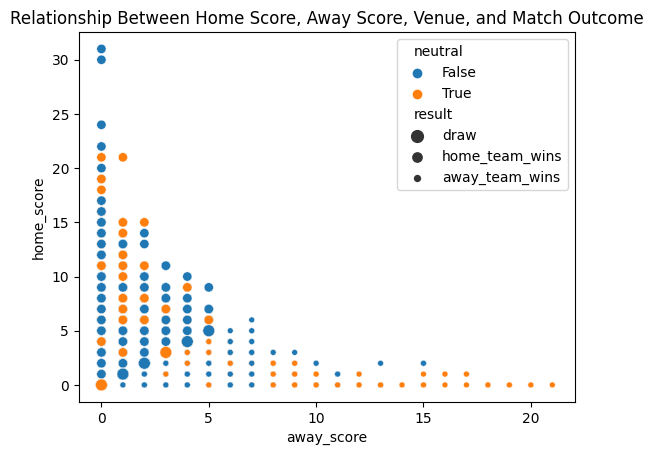

In [ ]:
# scores and venue of the game
sns.scatterplot(data = data,x=data['away_score'],y='home_score',hue = 'neutral',size = 'result')
plt.title("Relationship Between Home Score, Away Score, Venue, and Match Outcome");

The away scores were higher than the home scores when the games were played on neutral venues.
The home scores were higher than the away scores when games were played on non-neutral grounds.

These EDA findings provide initial insights into the dataset, but further analysis and modeling can be performed to explore deeper relationships and patterns.
This EDA serves as a starting point for understanding the data and can guide further exploration and decision-making in future analyses.


In [ ]:
modelling_data = data.to_csv('cleaned_data.csv',index = False)

In [ ]:
# Select the columns to be label encoded
columns_to_encode = ['result', 'neutral']

# Apply label encoding to the selected columns
data[columns_to_encode] = data[columns_to_encode].apply(le.fit_transform)
data

NameError: ignored